EXL CAPSTONE PROJECT - Credit Card Clustering and Segmentation
- Group member names : 
1) Disha Mahendra Raskar
2) Achal Jajoo


In [3]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('C:/Users/Dell/Downloads/data_credit_card_project1.csv')
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [11]:
missing_values = df.isnull().sum()
print(missing_values)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [19]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.drop(columns=['CUST_ID'], inplace=True)

In [17]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

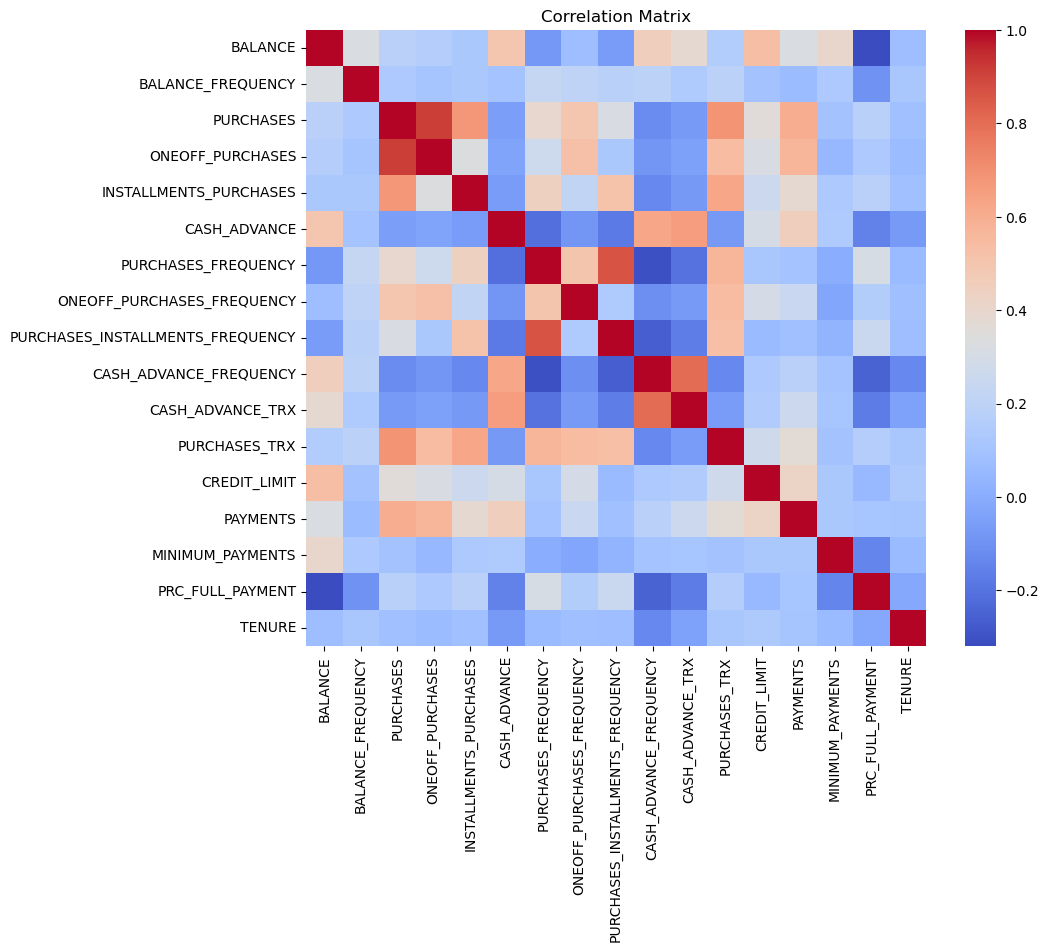

In [21]:
correlation_matrix = pd.DataFrame(data_scaled, columns=data.columns).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [24]:
import numpy as np


print(np.isnan(data_scaled).sum())  


314


In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  

data_scaled = imputer.fit_transform(data_scaled)


In [28]:
inertia = []
silhouette_scores = []

# Test K-means for k values between 2 and 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    
    inertia.append(kmeans.inertia_)
    
    # Silhouette Score
    if k > 1:
        score = silhouette_score(data_scaled, kmeans.labels_)
        silhouette_scores.append(score)
        print(f'For k = {k}, Silhouette Score = {score}')

For k = 2, Silhouette Score = 0.2096650693626291
For k = 3, Silhouette Score = 0.24998015962986883
For k = 4, Silhouette Score = 0.19787914818546587
For k = 5, Silhouette Score = 0.19348453895159062
For k = 6, Silhouette Score = 0.19615982487724995
For k = 7, Silhouette Score = 0.2150287999836473
For k = 8, Silhouette Score = 0.22203357886543287
For k = 9, Silhouette Score = 0.2130769745872603
For k = 10, Silhouette Score = 0.22023710575239558


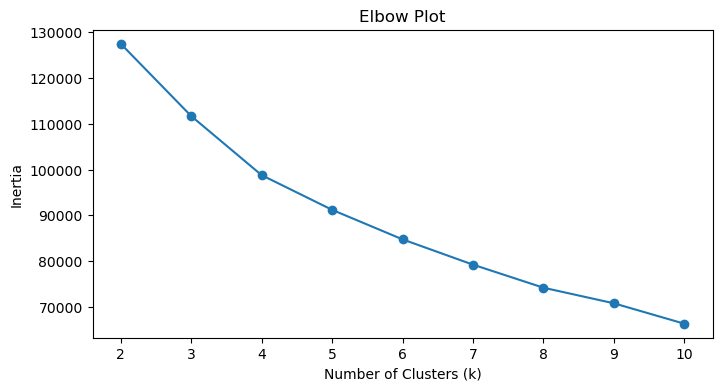

In [29]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


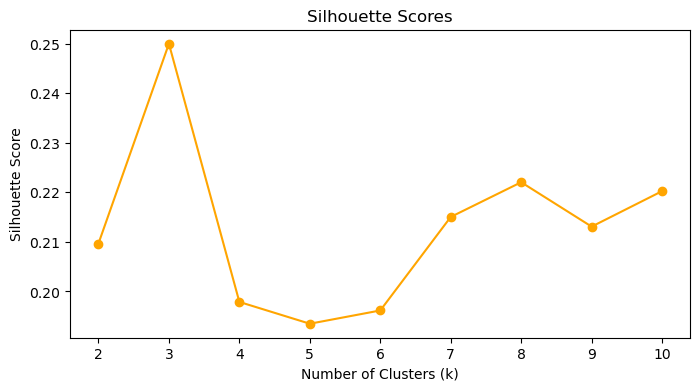

In [31]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

For k = 2 (PCA), Silhouette Score = 0.4647172257897315
For k = 3 (PCA), Silhouette Score = 0.4522960344408364
For k = 4 (PCA), Silhouette Score = 0.4077645253497714
For k = 5 (PCA), Silhouette Score = 0.4015820763376407
For k = 6 (PCA), Silhouette Score = 0.3855482894381968
For k = 7 (PCA), Silhouette Score = 0.3826251434341521
For k = 8 (PCA), Silhouette Score = 0.3945583415704933
For k = 9 (PCA), Silhouette Score = 0.3715390488256957
For k = 10 (PCA), Silhouette Score = 0.3648452140630259


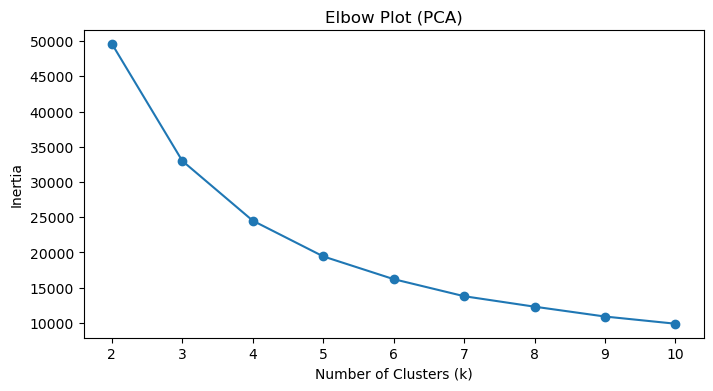

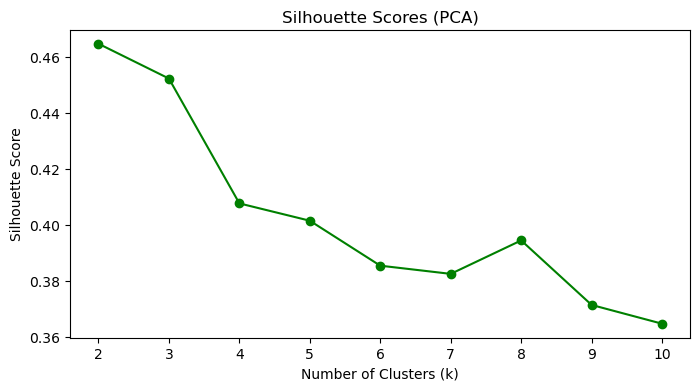

In [34]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)


inertia_pca = []
silhouette_scores_pca = []

for k in range(2, 11):
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_pca.fit(data_pca)
    
    inertia_pca.append(kmeans_pca.inertia_)
    
    if k > 1:
        score_pca = silhouette_score(data_pca, kmeans_pca.labels_)
        silhouette_scores_pca.append(score_pca)
        print(f'For k = {k} (PCA), Silhouette Score = {score_pca}')
        
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertia_pca, marker='o')
plt.title('Elbow Plot (PCA)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores_pca, marker='o', color='green')
plt.title('Silhouette Scores (PCA)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

         CREDIT_LIMIT      BALANCE    PURCHASES
Cluster                                        
0         3271.732329   803.135706   505.301746
1         6678.682104  3978.572138   382.607453
2         7734.612278  2228.855587  4262.423360


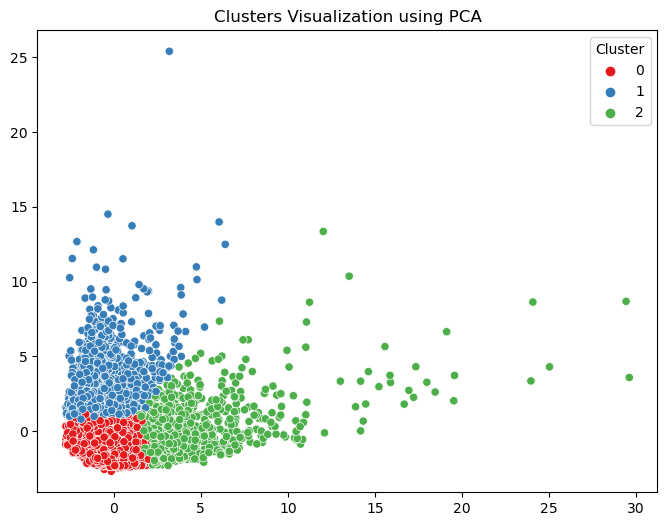

In [37]:

optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['Cluster'] = kmeans_final.fit_predict(data_scaled)

cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary[['CREDIT_LIMIT', 'BALANCE', 'PURCHASES']])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['Cluster'], palette='Set1')
plt.title('Clusters Visualization using PCA')
plt.show()